In [1]:
dataset = [
    ['apple','cheese','water'],
    ['water','walnut','cheese','fish'],
    ['watermelon','apple','water'],
    ['water','walnut','cheese','corn']
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 트랜잭션 자료형으로 변환
# x축 전체품목, y축 거래아이디

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [3]:
from mlxtend.frequent_patterns import apriori

# 선험적 알고리즘. 서포트 0.5 이상. 서포트 값을 낮추면 더 많은 규칙이 나옴
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(apple)
1,0.75,(cheese)
2,0.50,(walnut)
3,1.00,(water)
4,0.50,"(apple, water)"
5,0.50,"(walnut, cheese)"
6,0.75,"(water, cheese)"
7,0.50,"(walnut, water)"
8,0.50,"(walnut, water, cheese)"


In [4]:
from mlxtend.frequent_patterns import association_rules

# 서포트에 대한 규칙 외에 연관규칙association_rules로 규칙 추가
# confidence 기본값이 0.8인데 0.3으로 낮춤
# 첫 번째 행을 보면, 앞이 선행, 뒤가 후행. 생수를 산 사람이 사과를 살 확률은 50% 라는 식
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(apple),(water),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(water),(apple),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(walnut),(cheese),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
3,(cheese),(walnut),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
4,(water),(cheese),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
5,(cheese),(water),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
6,(walnut),(water),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(water),(walnut),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
8,"(walnut, water)",(cheese),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(walnut, cheese)",(water),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


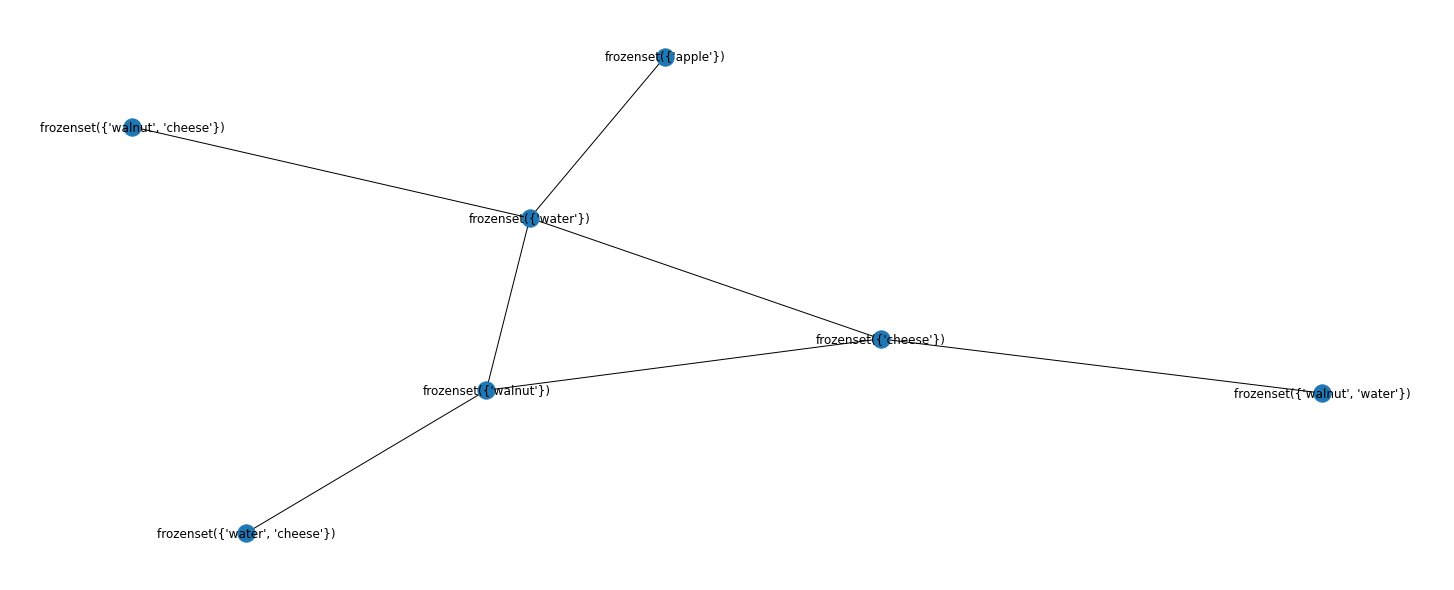

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

# source=선행=그래프의 안쪽 노드, target=후행=그래프의 바깥쪽 노드
ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,8))
nx.draw(ga, with_labels=True, font_size=12)

In [ ]:
# 카페 데이터

In [6]:
dataset = [
    ['Americano', 'Latte'], ['Latte', 'Americano', 'Cappucchino'],
    ['Vanilla Latte', 'Americano'], ['Green Tea Latte', 'Latte', 'Americano'],
    ['Cafe Mocha', 'Americano'], ['Americano', 'Latte'],
    ['Chocolate', 'Americano'], ['Americano'], ['Cafe Mocha', 'Latte']
]

In [7]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Americano,Cafe Mocha,Cappucchino,Chocolate,Green Tea Latte,Latte,Vanilla Latte
0,True,False,False,False,False,True,False
1,True,False,True,False,False,True,False
2,True,False,False,False,False,False,True
3,True,False,False,False,True,True,False
4,True,True,False,False,False,False,False
5,True,False,False,False,False,True,False
6,True,False,False,True,False,False,False
7,True,False,False,False,False,False,False
8,False,True,False,False,False,True,False


In [9]:
from mlxtend.frequent_patterns import apriori

itemset = apriori(df, use_colnames=True)
itemset

,support,itemsets
0,0.888889,(Americano)
1,0.555556,(Latte)


In [10]:
from mlxtend.frequent_patterns import apriori

itemset = apriori(df, min_support=0.1, use_colnames=True)
itemset

,support,itemsets
0,0.888889,(Americano)
1,0.222222,(Cafe Mocha)
2,0.111111,(Cappucchino)
3,0.111111,(Chocolate)
4,0.111111,(Green Tea Latte)
5,0.555556,(Latte)
6,0.111111,(Vanilla Latte)
7,0.111111,"(Cafe Mocha, Americano)"
8,0.111111,"(Cappucchino, Americano)"
9,0.111111,"(Americano, Chocolate)"


In [12]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(itemset, metric="confidence", min_threshold=0.6)
rules

# lift 값을 보았을 때 1보다 높으면 양의 상관관계가 있는 것

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cappucchino),(Americano),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
1,(Chocolate),(Americano),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
2,(Green Tea Latte),(Americano),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
3,(Latte),(Americano),0.555556,0.888889,0.444444,0.8,0.900,-0.049383,0.555556
4,(Vanilla Latte),(Americano),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
5,(Cappucchino),(Latte),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
6,(Green Tea Latte),(Latte),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
7,"(Latte, Cappucchino)",(Americano),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
8,"(Cappucchino, Americano)",(Latte),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
9,(Cappucchino),"(Latte, Americano)",0.111111,0.444444,0.111111,1.0,2.250,0.061728,inf


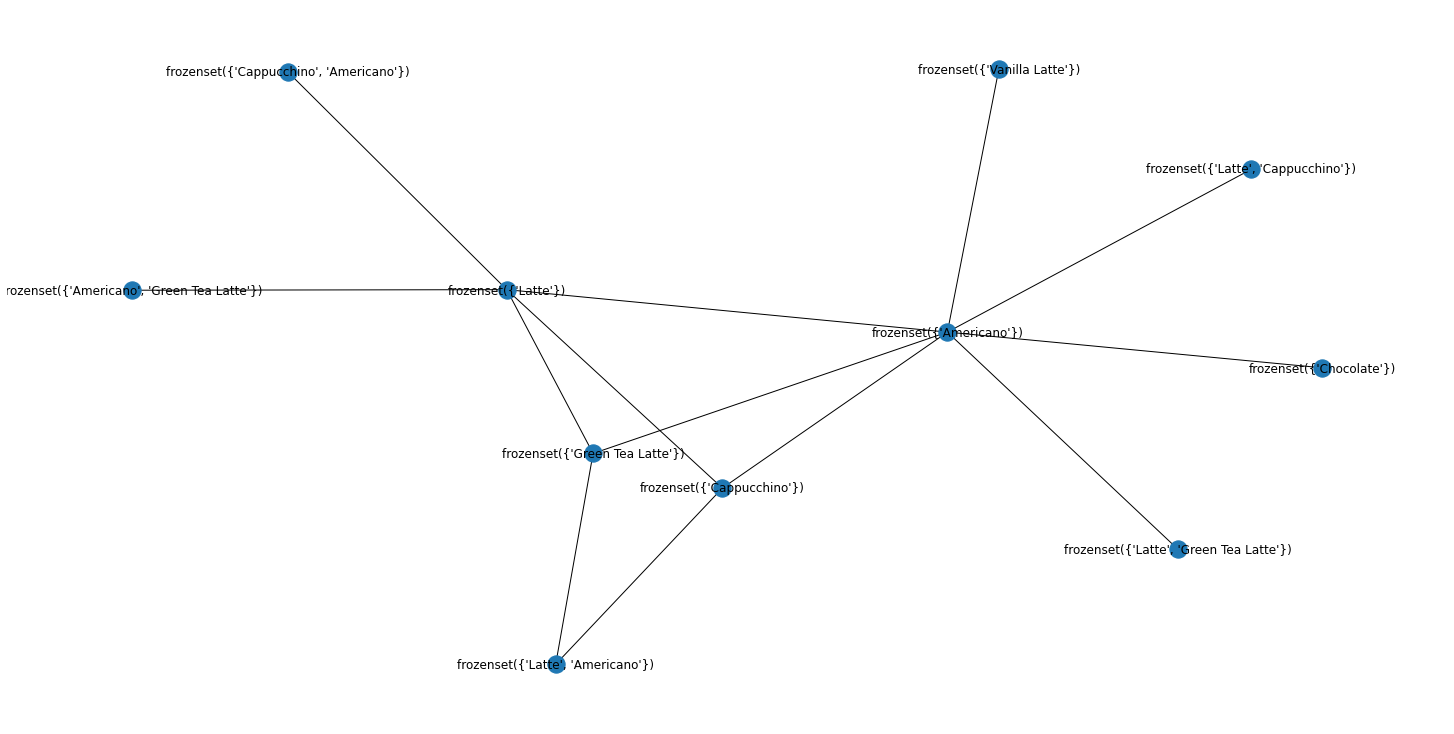

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,10))
nx.draw(ga, with_labels=True, font_size=12)

In [1]:
data = [
    ['Socks', 'Tie', 'Shoes'],
    ['Shoes', 'Pants', 'Tie', 'Shirts'],
    ['Hat', 'Socks', 'Shoes'],
    ['Shoes', 'Pants', 'Tie', 'Gloves']
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Gloves,Hat,Pants,Shirts,Shoes,Socks,Tie
0,False,False,False,False,True,True,True
1,False,False,True,True,True,False,True
2,False,True,False,False,True,True,False
3,True,False,True,False,True,False,True


In [5]:
from mlxtend.frequent_patterns import apriori

frequent = apriori(df, min_support=0.5, use_colnames=True)
frequent

,support,itemsets
0,0.50,(Pants)
1,1.00,(Shoes)
2,0.50,(Socks)
3,0.75,(Tie)
4,0.50,"(Shoes, Pants)"
5,0.50,"(Tie, Pants)"
6,0.50,"(Socks, Shoes)"
7,0.75,"(Shoes, Tie)"
8,0.50,"(Shoes, Tie, Pants)"


In [6]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent, metric="confidence", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Shoes),(Pants),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(Pants),(Shoes),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(Tie),(Pants),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
3,(Pants),(Tie),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
4,(Socks),(Shoes),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(Shoes),(Socks),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(Shoes),(Tie),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
7,(Tie),(Shoes),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
8,"(Shoes, Tie)",(Pants),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(Shoes, Pants)",(Tie),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


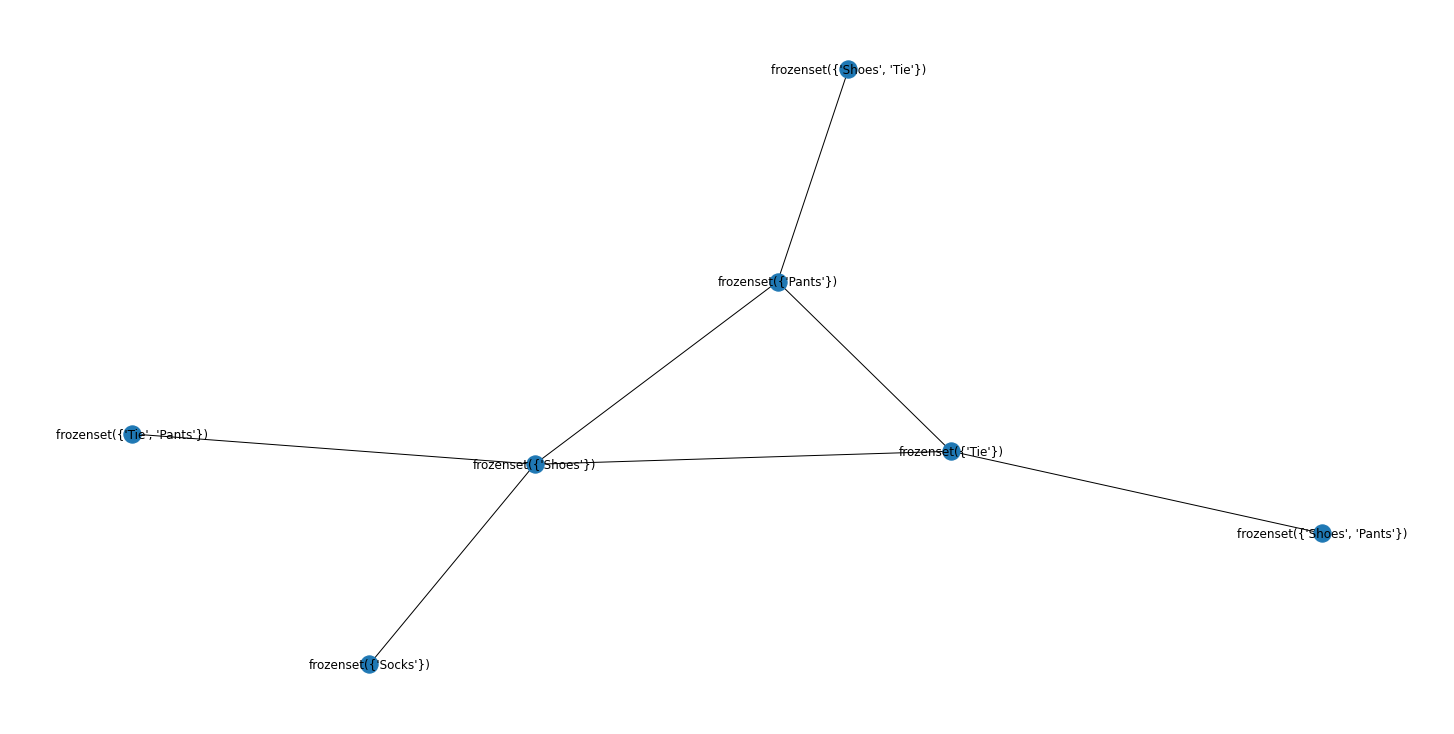

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,10))
nx.draw(ga, with_labels=True, font_size=12)

In [ ]:
# dvd 대여

In [8]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/basket/dvdtrans.csv")
df.shape

(30, 2)

In [10]:
items = []
for row in range(0, df.shape[0]):
    items.append([df.iloc[row,0],str(df.iloc[row,1])])
items

[[1, 'Sixth Sense'],
 [1, 'LOTR1'],
 [1, 'Harry Potter1'],
 [1, 'Green Mile'],
 [1, 'LOTR2'],
 [2, 'Gladiator'],
 [2, 'Patriot'],
 [2, 'Braveheart'],
 [3, 'LOTR1'],
 [3, 'LOTR2'],
 [4, 'Gladiator'],
 [4, 'Patriot'],
 [4, 'Sixth Sense'],
 [5, 'Gladiator'],
 [5, 'Patriot'],
 [5, 'Sixth Sense'],
 [6, 'Gladiator'],
 [6, 'Patriot'],
 [6, 'Sixth Sense'],
 [7, 'Harry Potter1'],
 [7, 'Harry Potter2'],
 [8, 'Gladiator'],
 [8, 'Patriot'],
 [9, 'Gladiator'],
 [9, 'Patriot'],
 [9, 'Sixth Sense'],
 [10, 'Sixth Sense'],
 [10, 'LOTR'],
 [10, 'Gladiator'],
 [10, 'Green Mile']]

In [12]:
result = []
for i in range(1,11): # 10명
    row = []
    for item in items:
        if item[0] == i:
            row.append(item[1])
    result.append(row)

result

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
t_arr = te.fit(result).transform(result)
df2 = pd.DataFrame(t_arr, columns=te.columns_)
df2

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,False,True,True,False,False,True,True,False,True
1,True,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False
3,False,True,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,True,True
5,False,True,False,False,False,False,False,False,True,True
6,False,False,False,True,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,True,True
9,False,True,True,False,False,True,False,False,False,True


In [14]:
from mlxtend.frequent_patterns import apriori

frequent = apriori(df2, min_support=0.2, use_colnames=True)
frequent

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(Green Mile)
2,0.2,(Harry Potter1)
3,0.2,(LOTR1)
4,0.2,(LOTR2)
5,0.6,(Patriot)
6,0.6,(Sixth Sense)
7,0.6,"(Gladiator, Patriot)"
8,0.5,"(Gladiator, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [15]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


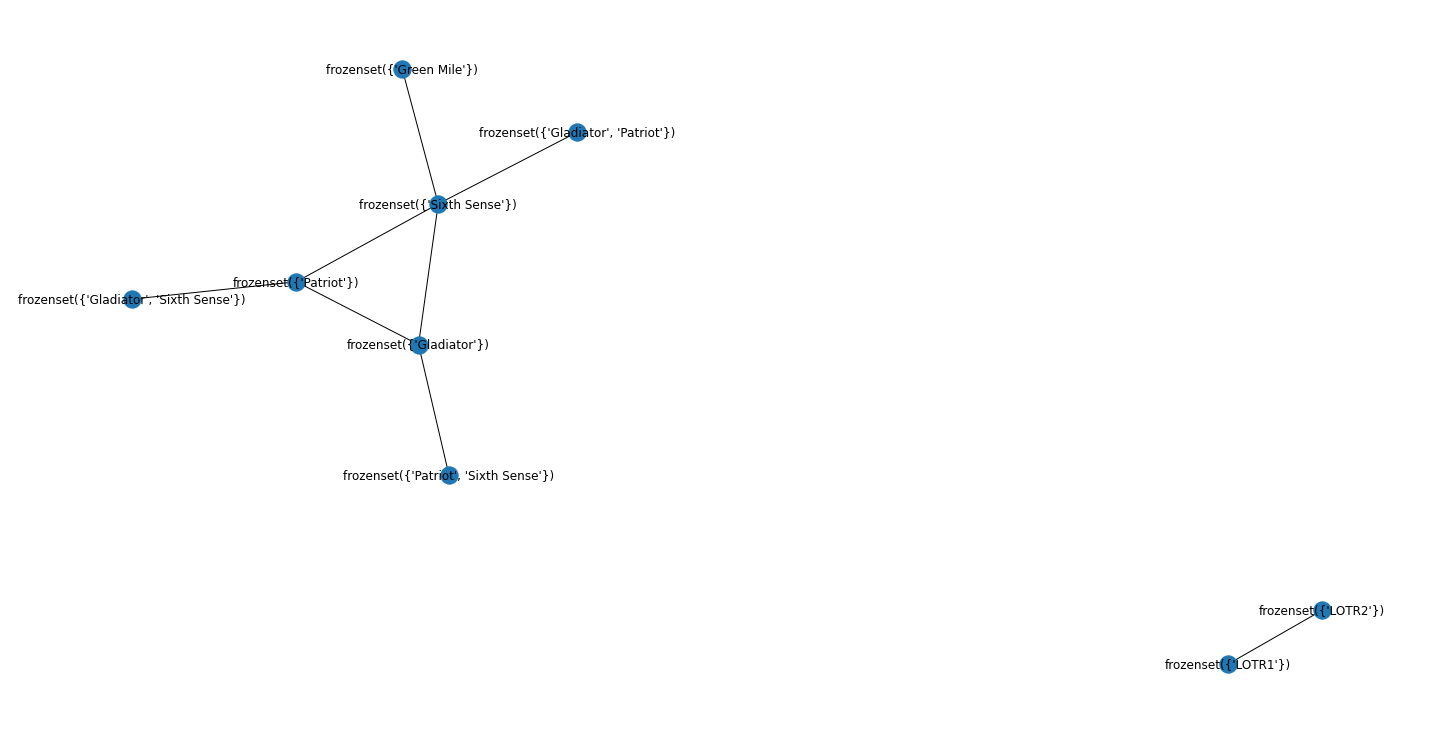

In [16]:
%matplotlib inline

ga = nx.from_pandas_edgelist(rules, source="antecedents", target="consequents")
plt.figure(figsize=(20,10))
nx.draw(ga, with_labels=True, font_size=12)
plt.show()